In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

In [2]:
with open('X_train.pkl', 'rb') as f:
    X = pickle.load(f)

In [3]:
with open('y_train.pkl', 'rb') as f:
    y = pickle.load(f)

In [4]:
drop = ['created_at', 'text', 'pos', 'ner']
X = X.drop(drop, axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
y_train, y_test = np.array(y_train), np.array(y_test)

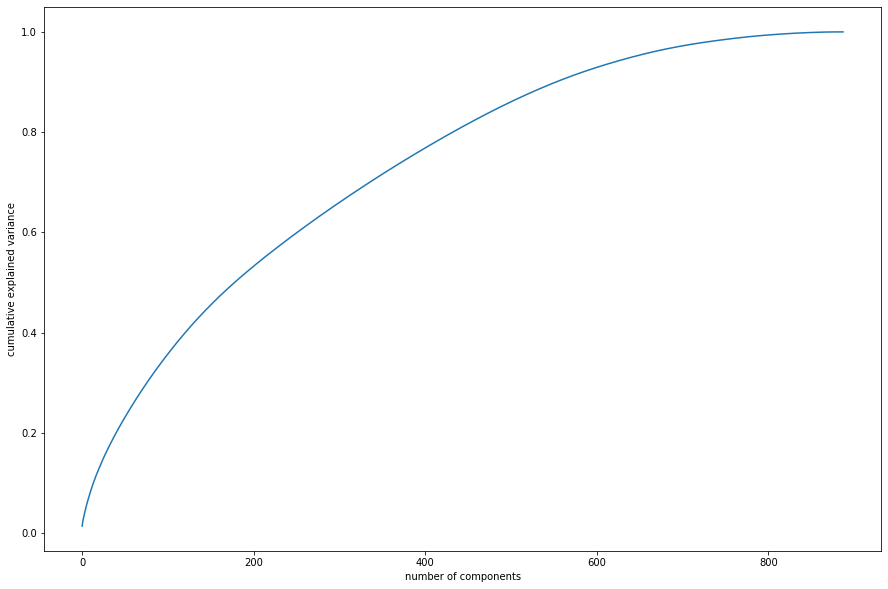

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(PCA().fit(X_train).explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [22]:
pca = PCA(n_components=2)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.0139021  0.01115854]
[0.0139021  0.02506065]


In [24]:
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(X_train, np.ravel(y_train))
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

/Users/graffer/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(888, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/graffer/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/graffer/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [25]:
X_test_pca.shape

(3319, 2)

In [26]:
X_test_lda.shape

(3319, 1)

In [27]:
y_test.shape

(3319, 1)

In [28]:
data_pca = pd.DataFrame(X_test_pca)
data_pca['class'] = y_test

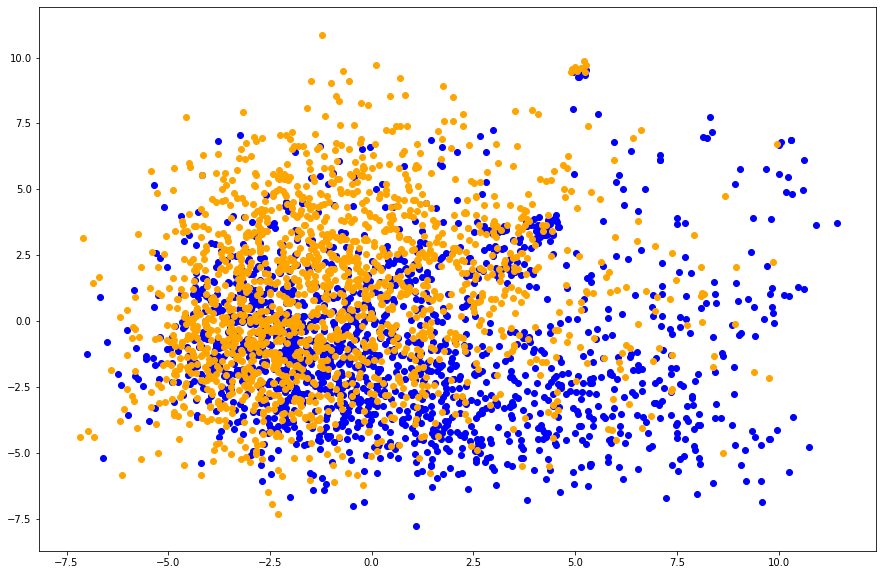

In [29]:
plt.figure(figsize=(15, 10))
plt.scatter(data_pca[data_pca['class'] == 0][0],data_pca[data_pca['class'] == 0][1], c='blue')
plt.scatter(data_pca[data_pca['class'] == 1][0],data_pca[data_pca['class'] == 1][1], c='orange')
plt.show()

In [30]:
# kernel pca
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']

In [31]:
def kernel_pca(kernel, X_train=X_train, X_test=X_test, y_test=y_test):
    print('kernel: ', kernel)
    if kernel in ['rbf', 'poly', 'sigmoid']:
        gammas = [.005, .05, .1, .25, .4, .5, .6, .75, .9, .95, .995]
    else:
        gammas = [.5]
    for gamma in gammas:
        print('gamma: ', gamma)
        pca = KernelPCA(n_components=2, gamma=gamma, kernel=kernel, n_jobs=-1)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)

        data_pca = pd.DataFrame(X_test_pca)
        data_pca['class'] = y_test

        plt.figure(figsize=(15, 10))
        plt.scatter(data_pca[data_pca['class'] == 0][0],data_pca[data_pca['class'] == 0][1], c='blue')
        plt.scatter(data_pca[data_pca['class'] == 1][0],data_pca[data_pca['class'] == 1][1], c='orange')
        plt.show()

kernel:  linear
gamma:  0.5


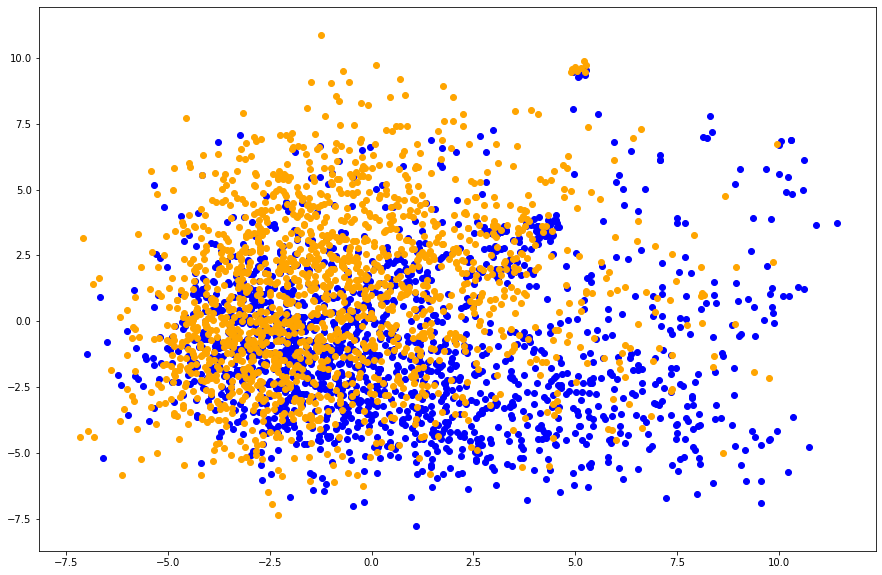

kernel:  poly
gamma:  0.005


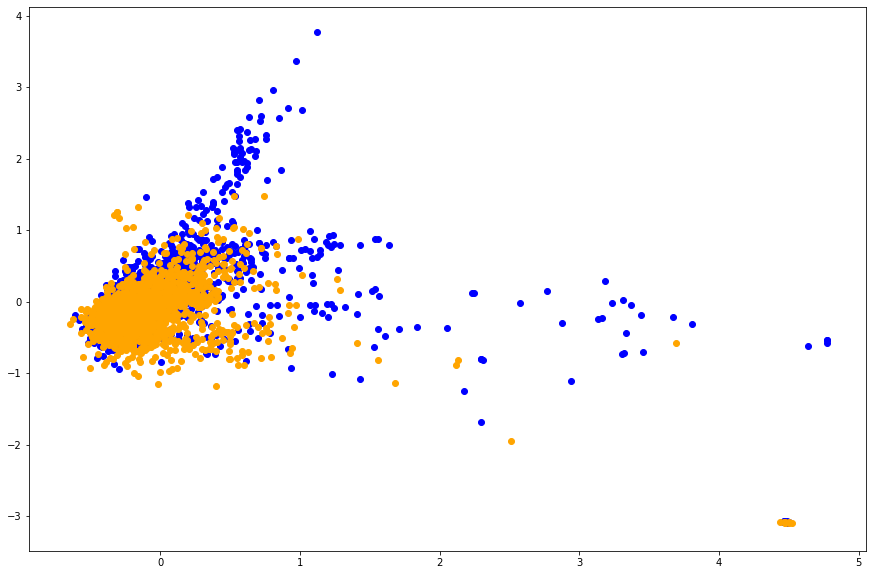

gamma:  0.05


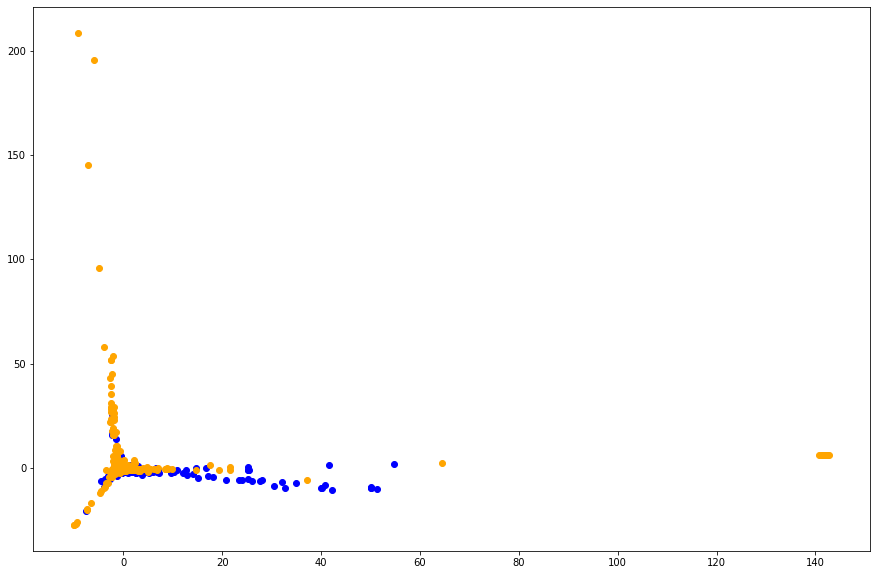

gamma:  0.1


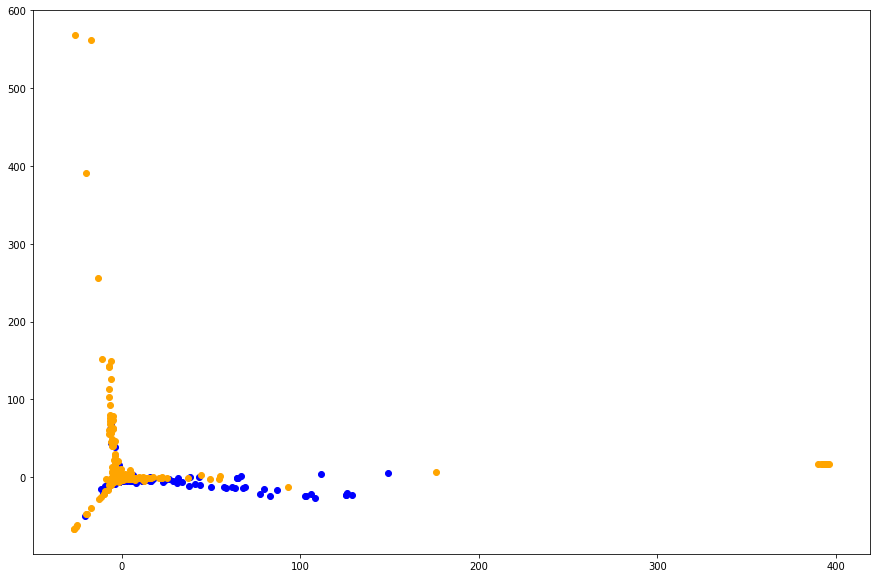

gamma:  0.25


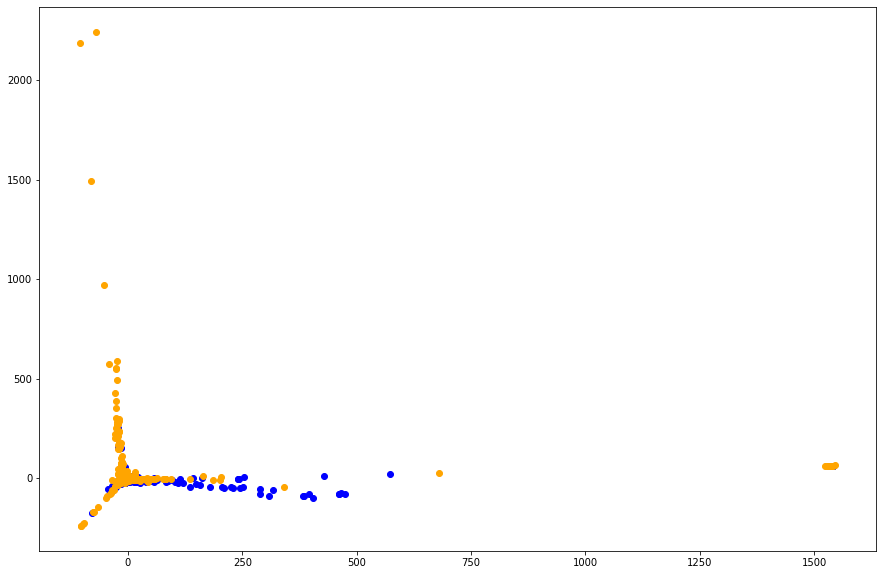

gamma:  0.4


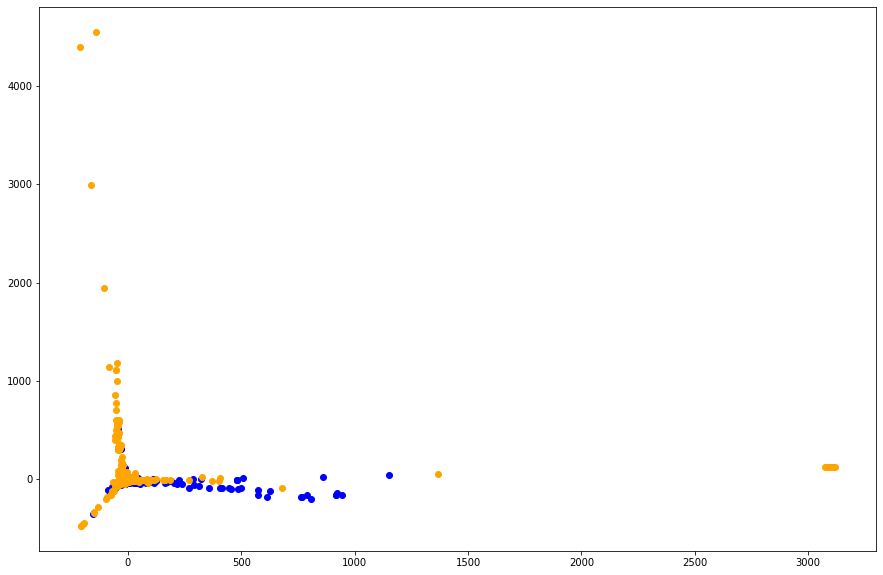

gamma:  0.5


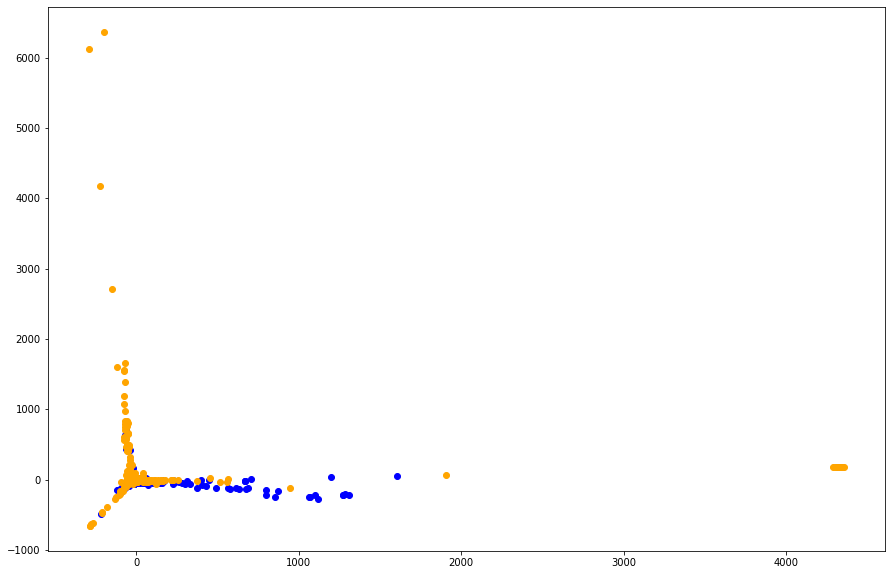

gamma:  0.6


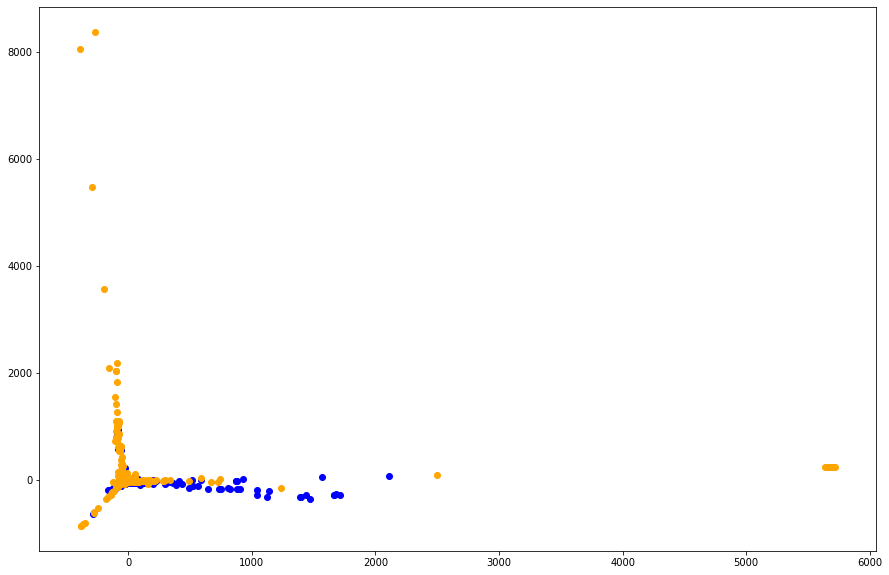

gamma:  0.75


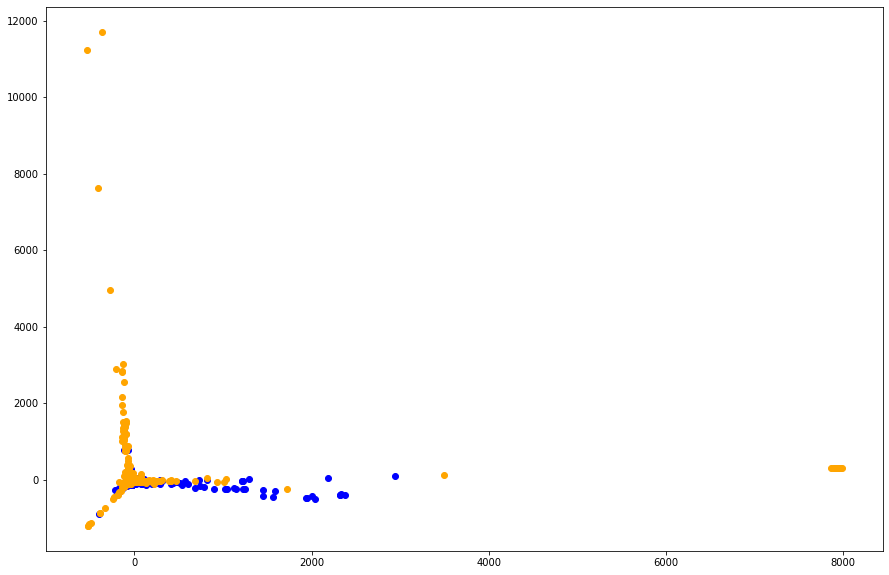

gamma:  0.9


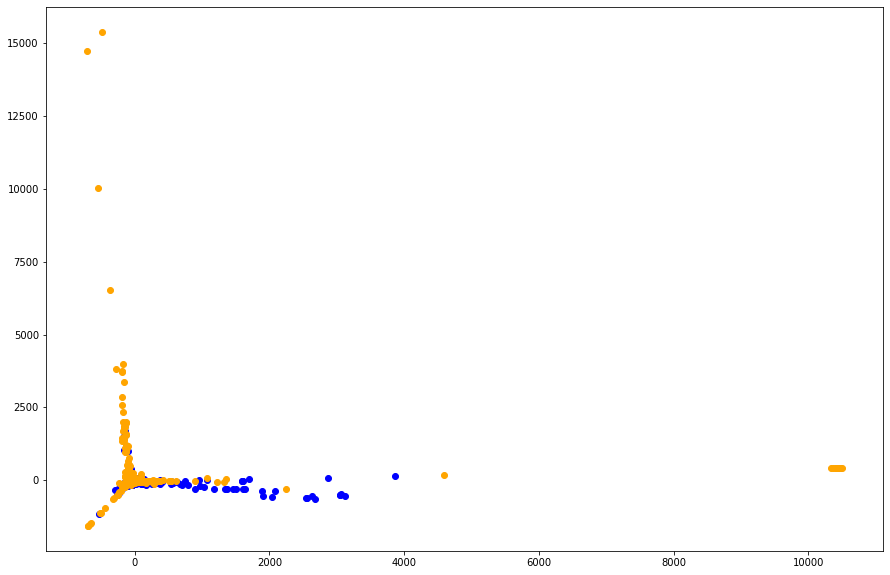

gamma:  0.95


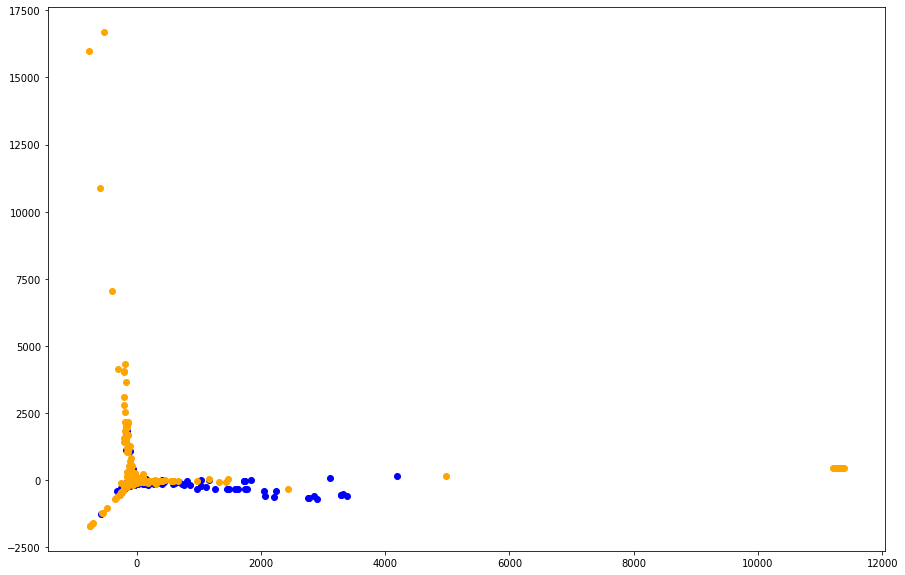

gamma:  0.995


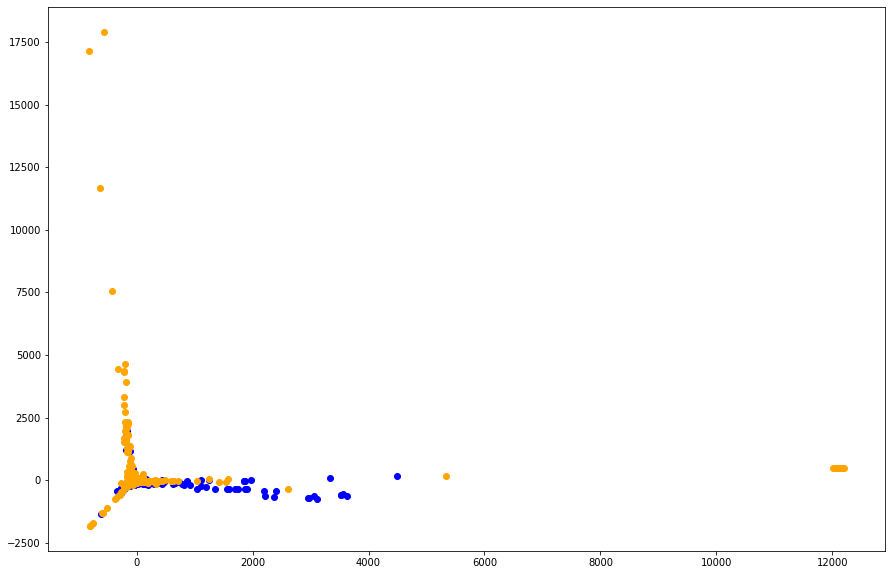

kernel:  rbf
gamma:  0.005


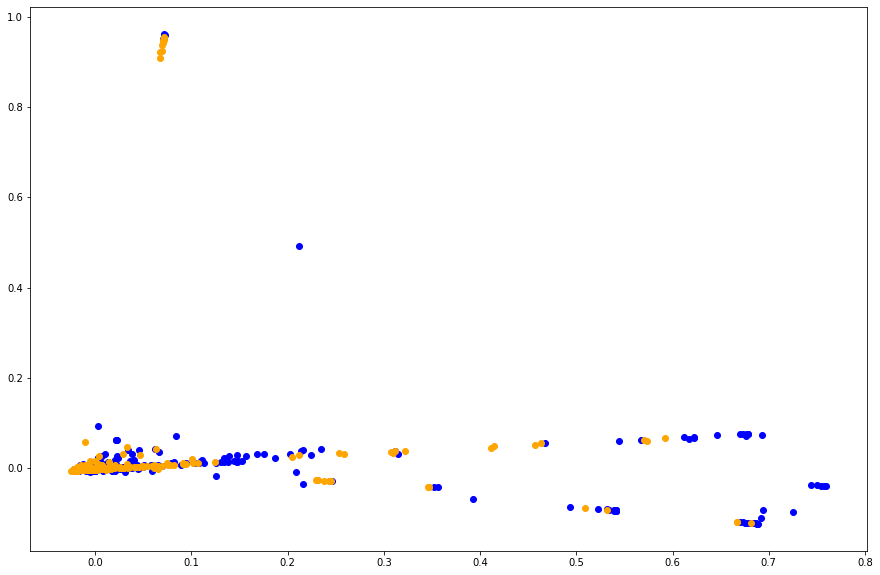

gamma:  0.05


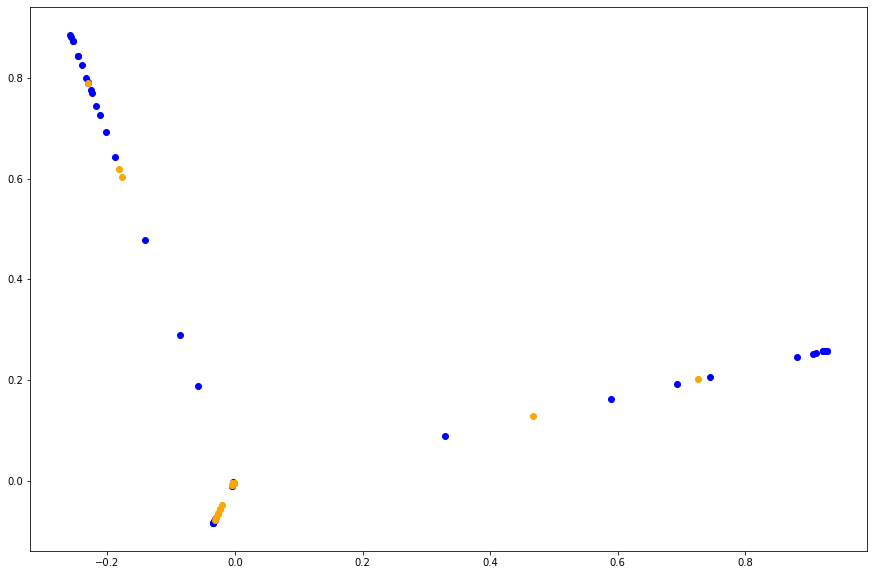

gamma:  0.1


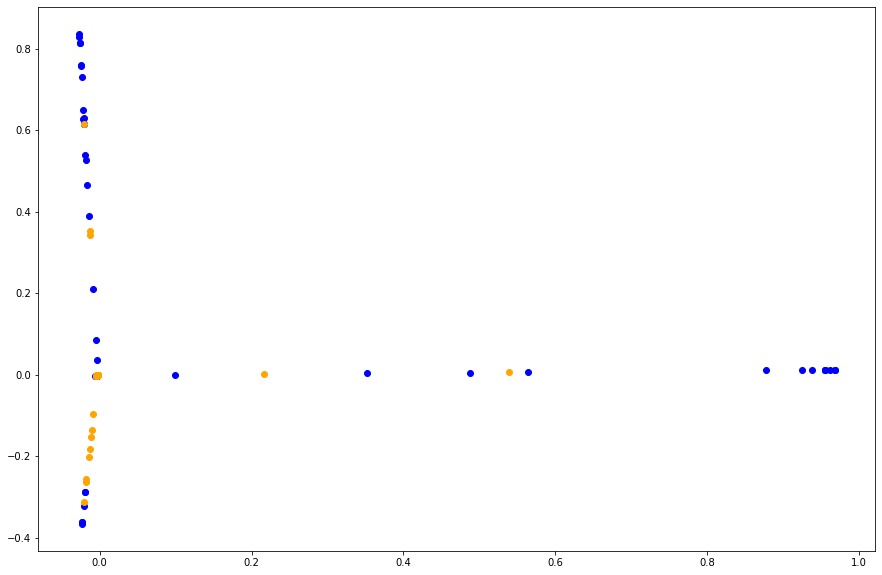

gamma:  0.25


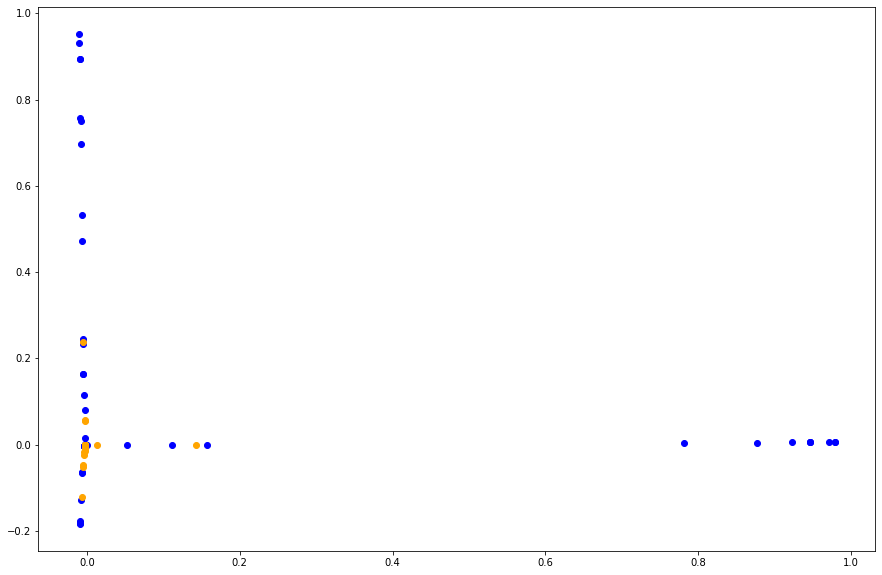

gamma:  0.4


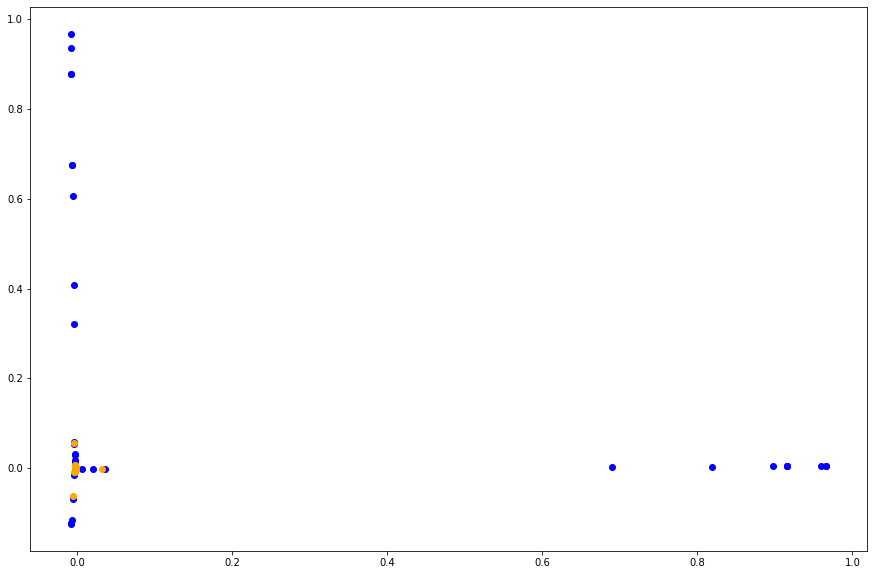

gamma:  0.5


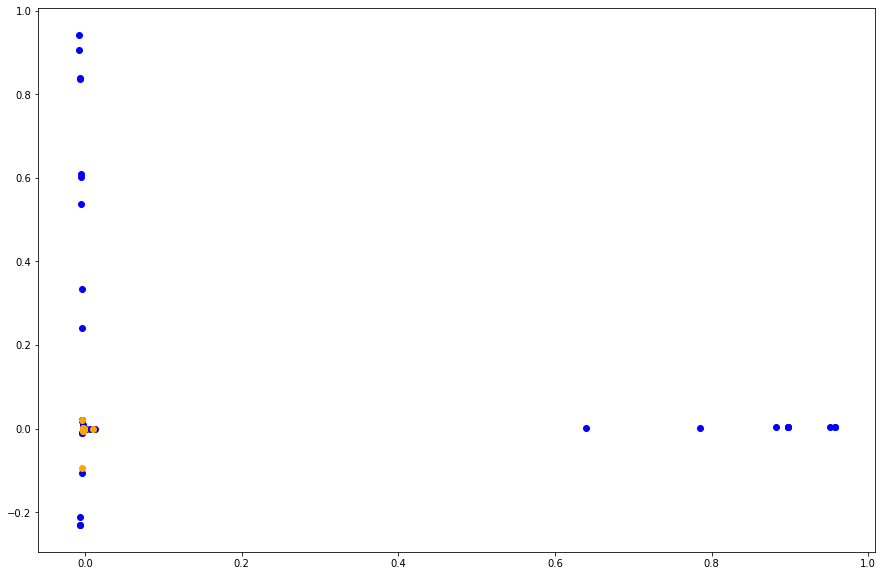

gamma:  0.6


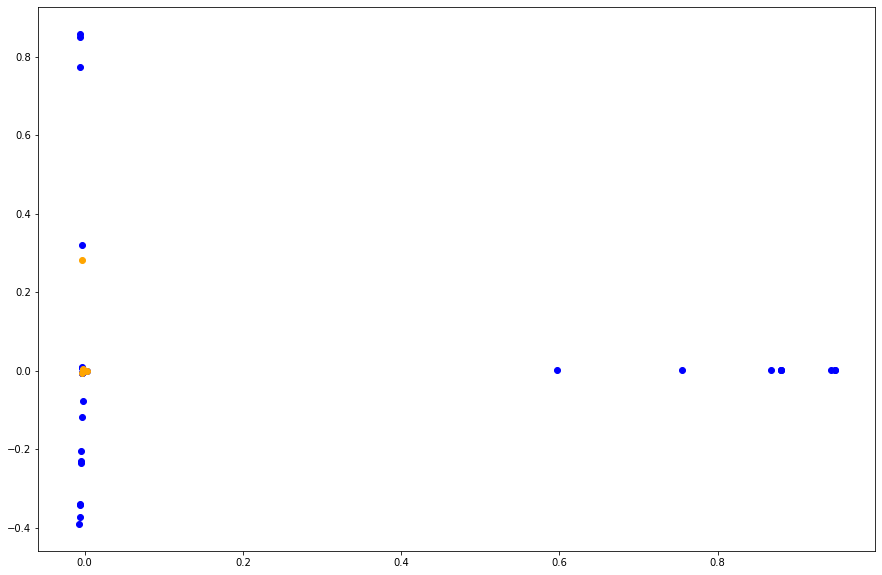

gamma:  0.75


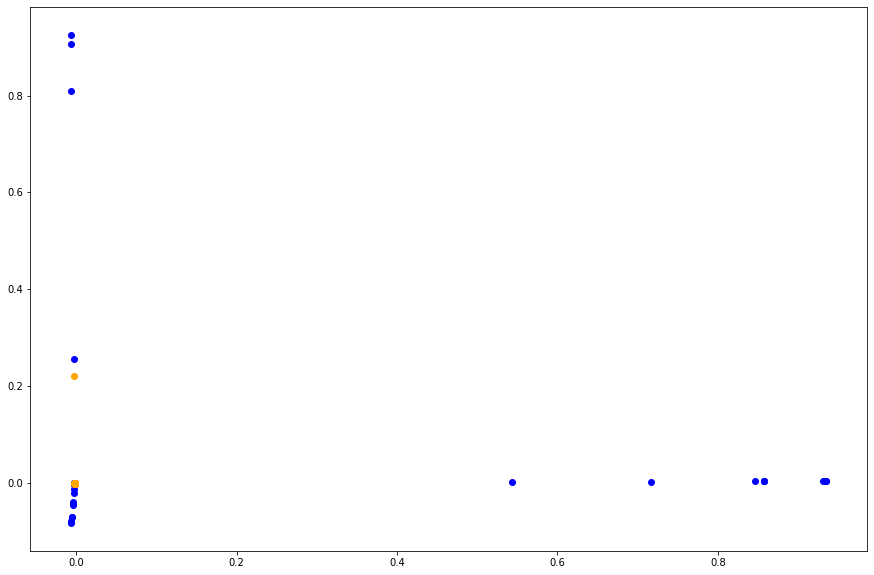

gamma:  0.9


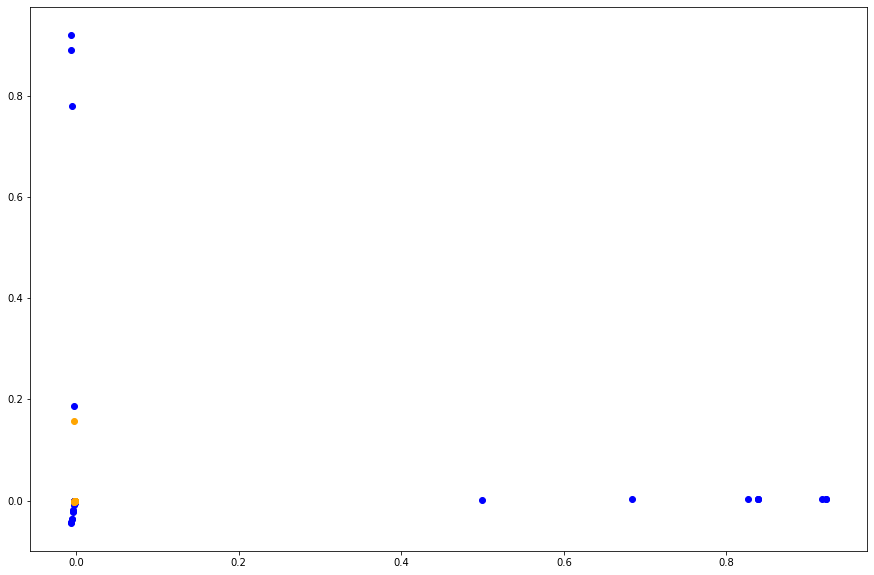

gamma:  0.95


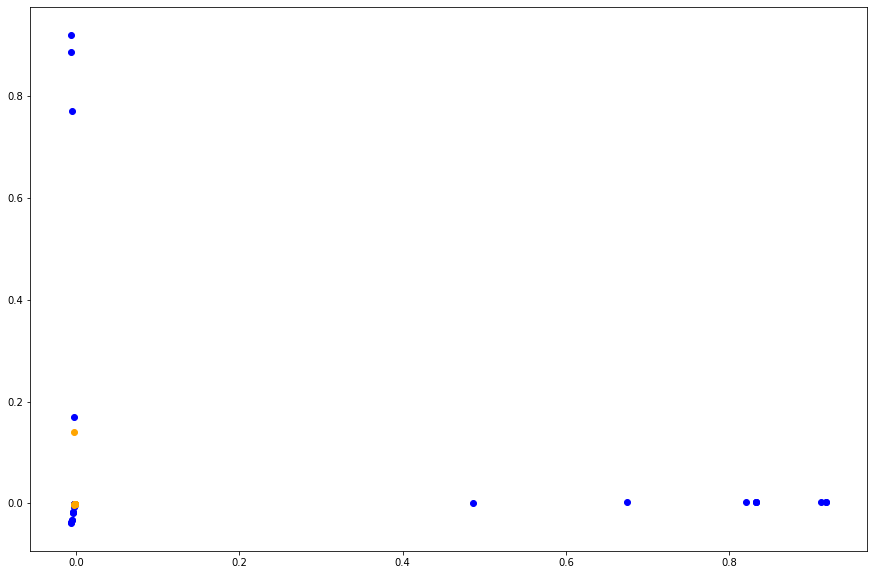

gamma:  0.995


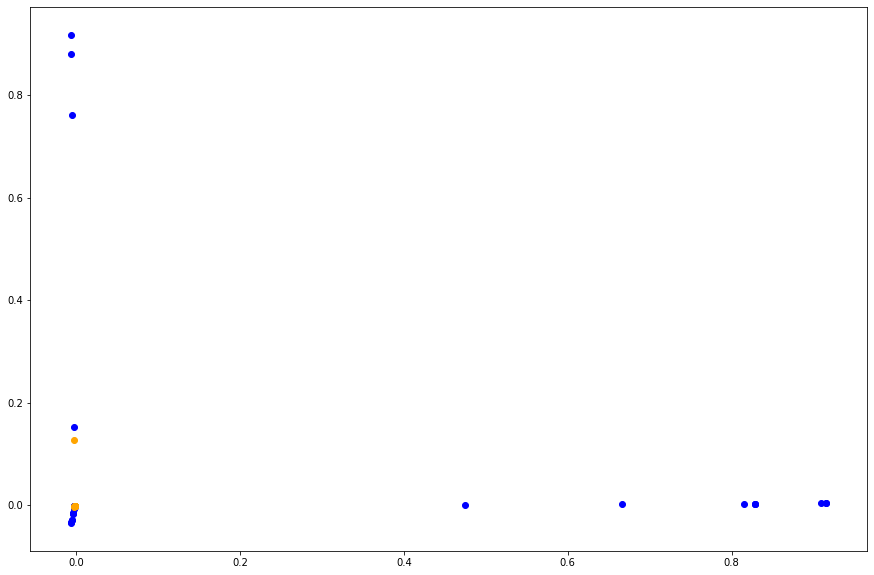

kernel:  sigmoid
gamma:  0.005


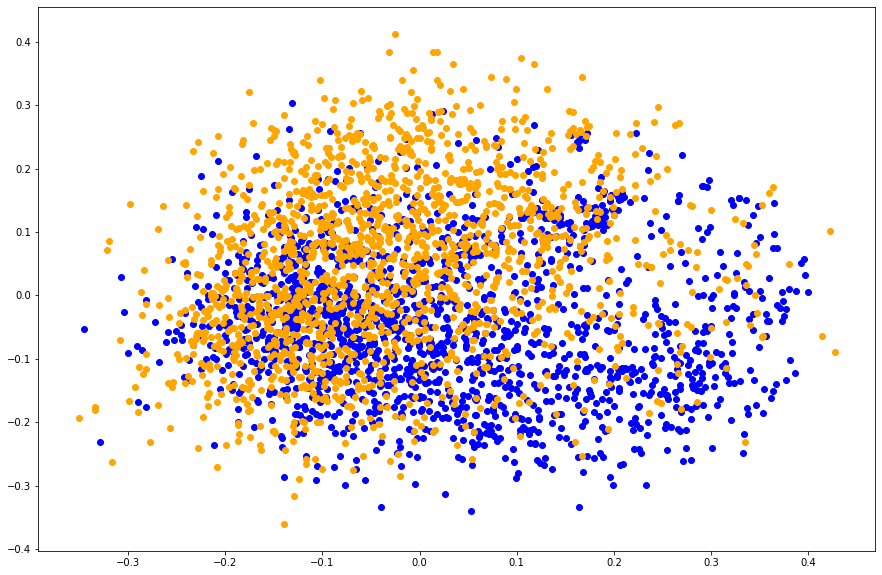

gamma:  0.05


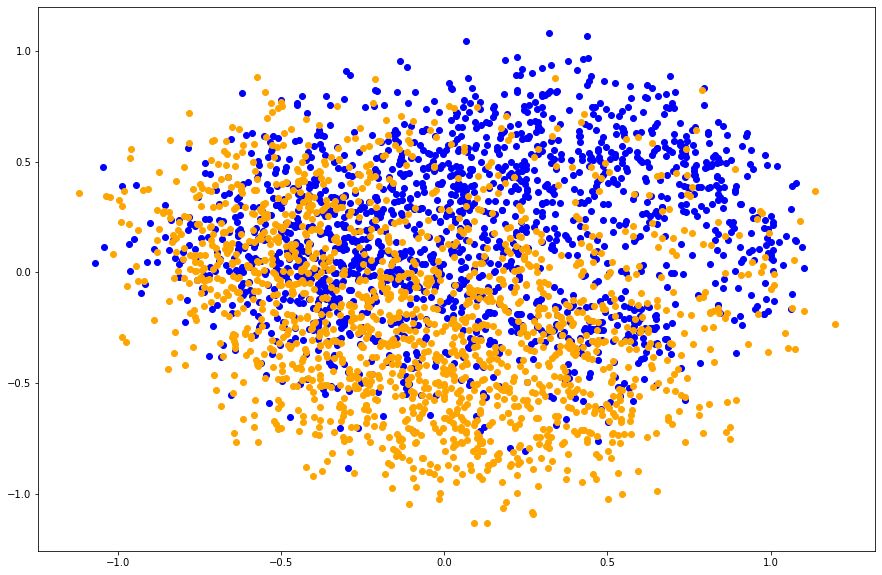

gamma:  0.1


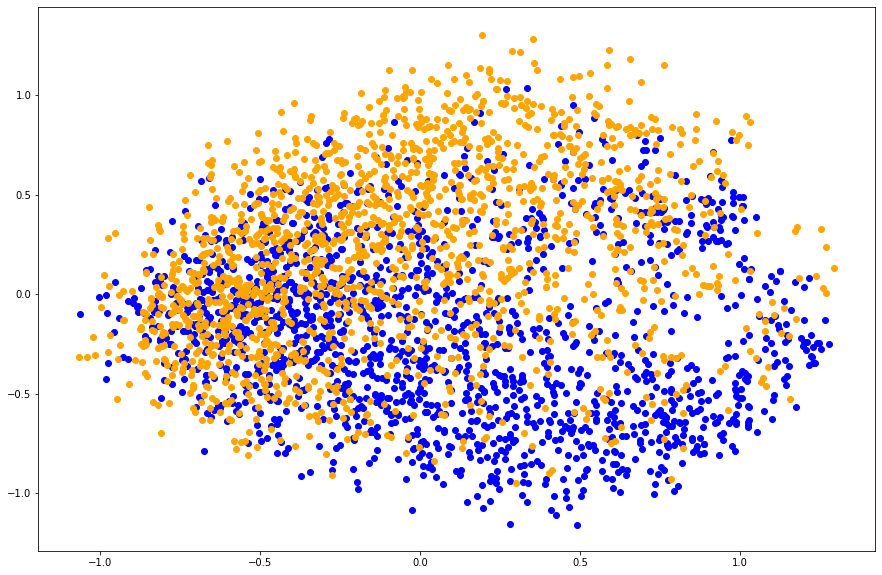

gamma:  0.25


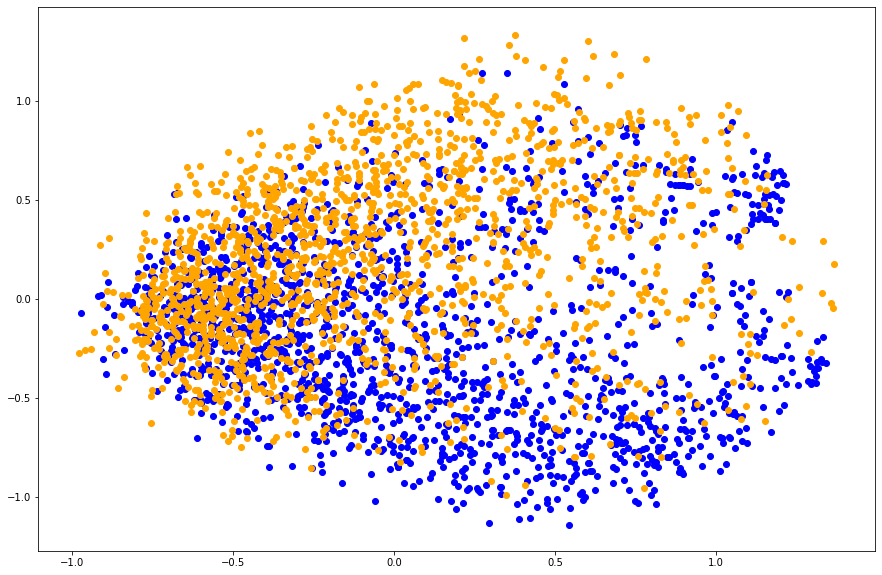

gamma:  0.4


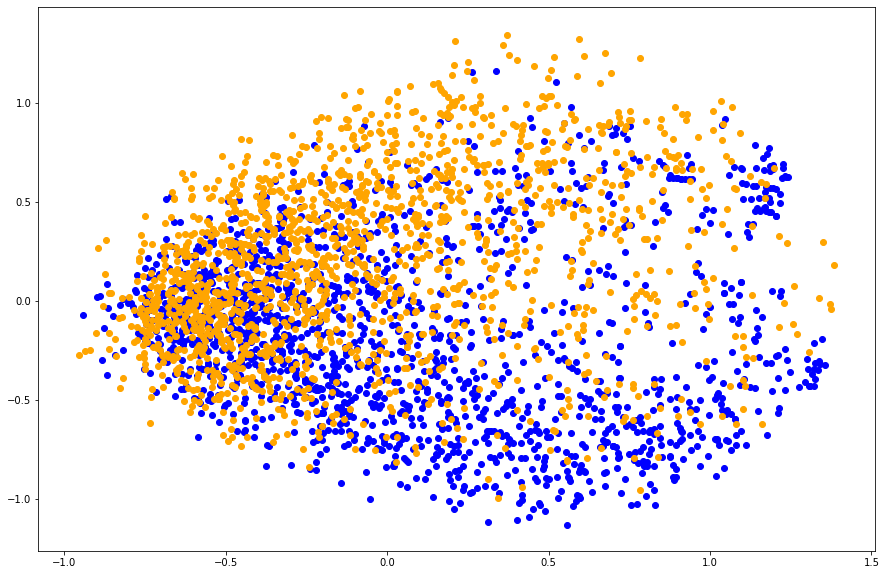

gamma:  0.5


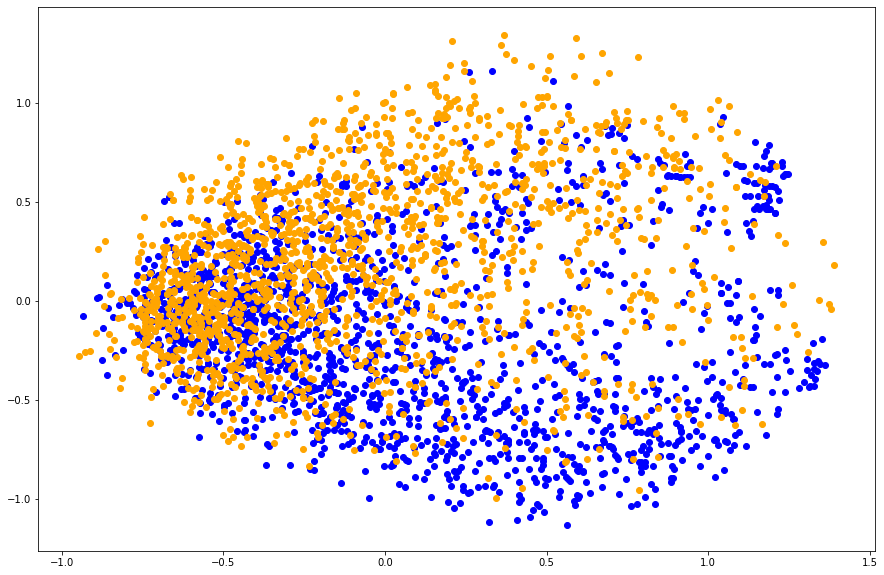

gamma:  0.6


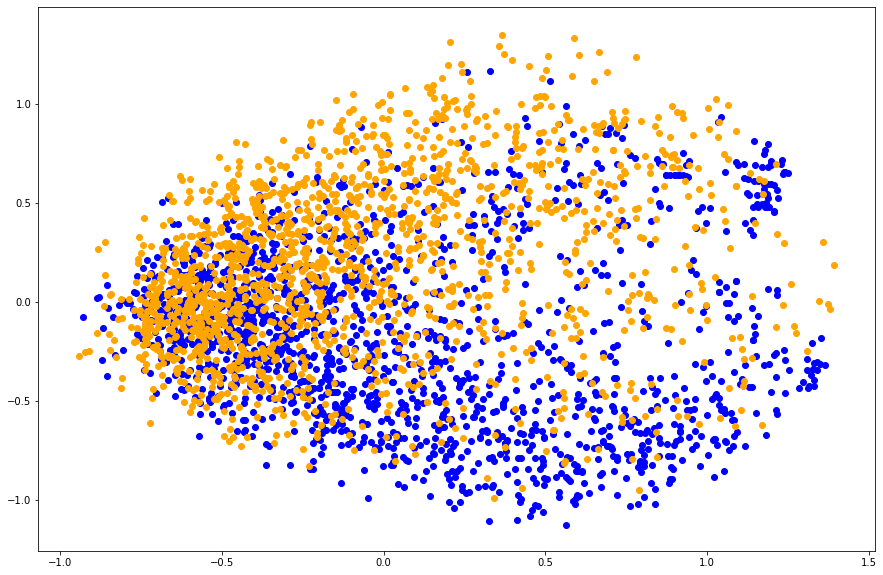

gamma:  0.75


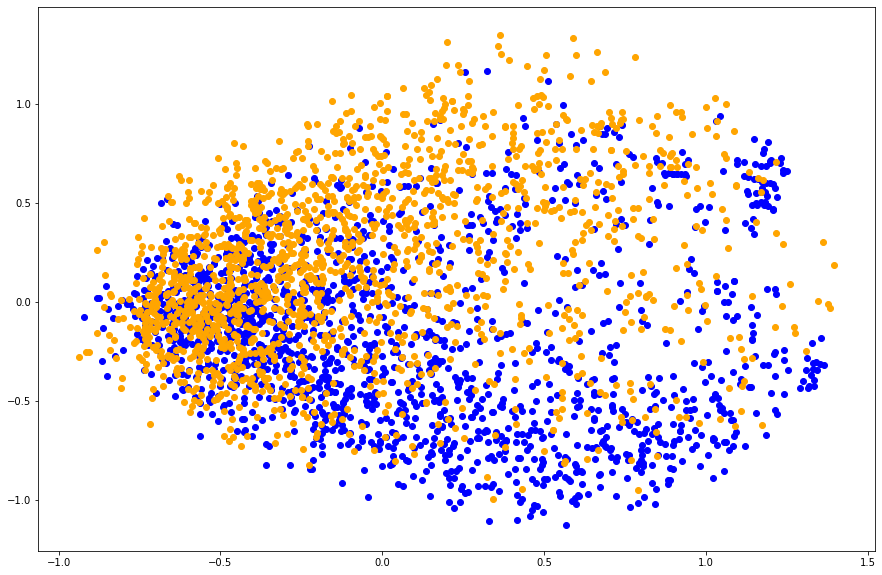

gamma:  0.9


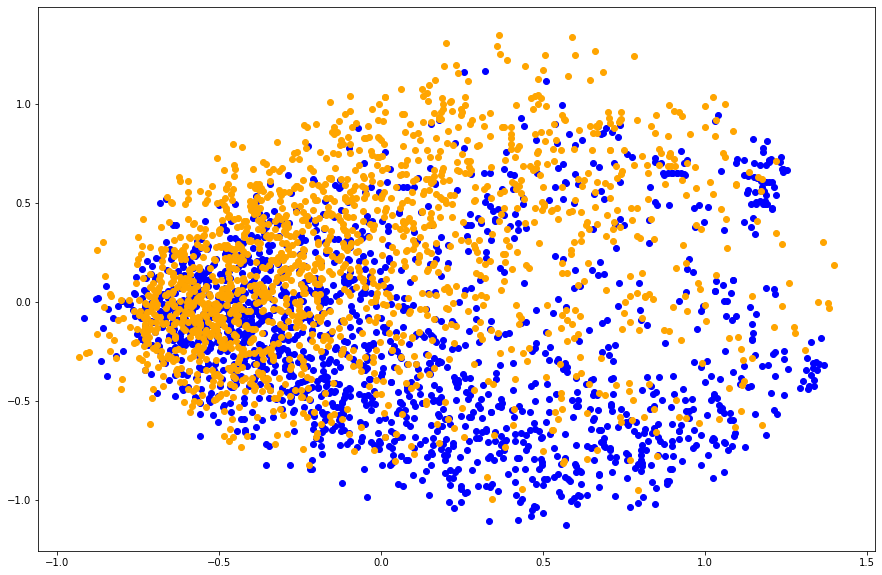

gamma:  0.95


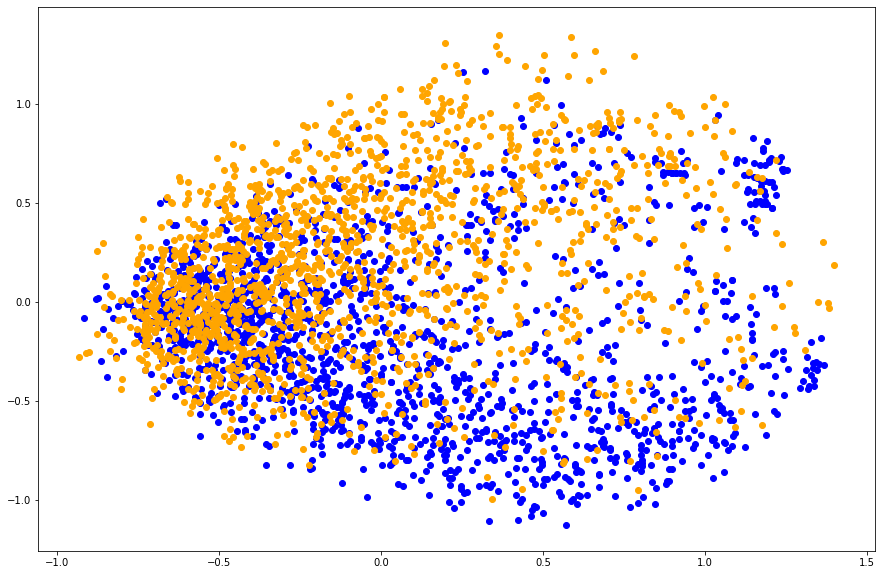

gamma:  0.995


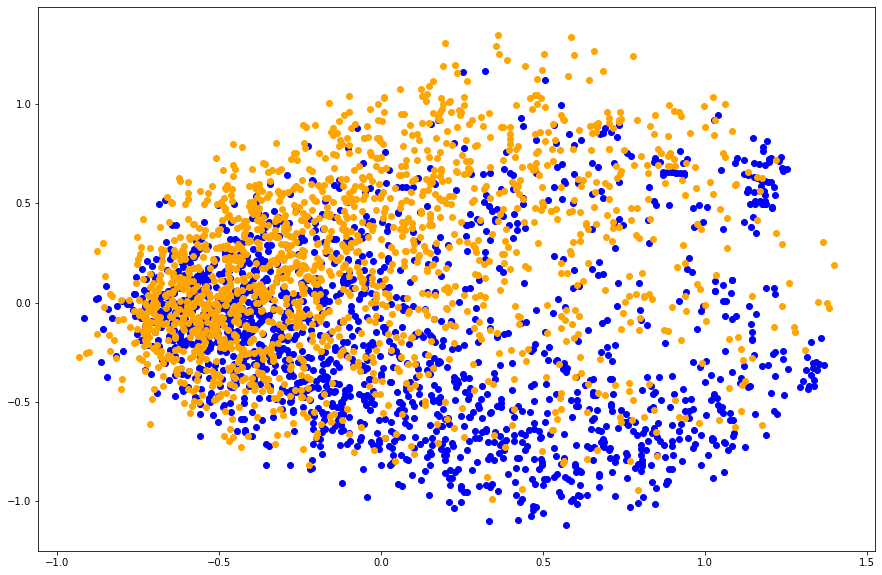

kernel:  cosine
gamma:  0.5


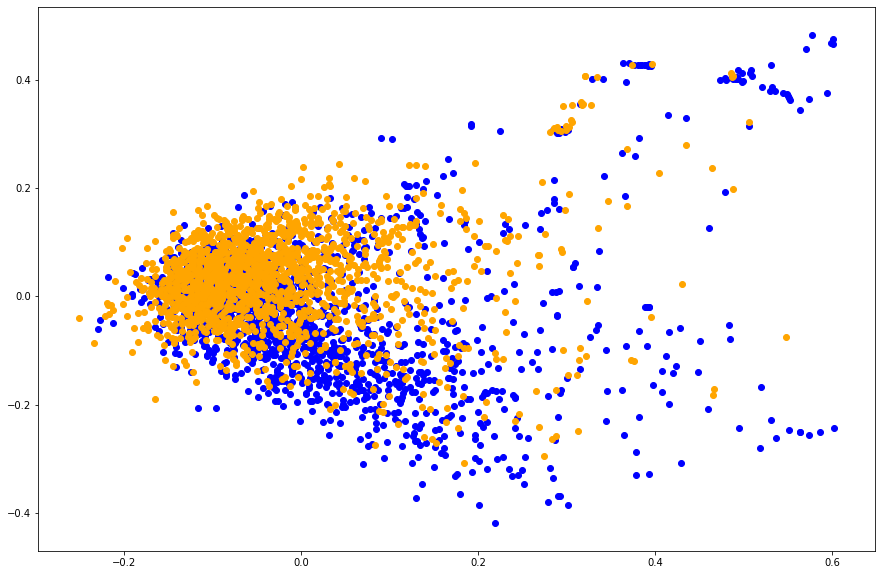

In [32]:
for kernel in kernels:
    kernel_pca(kernel)

In [39]:
#def say_hello():
#    print('Hello, World')

#for i in range(5):
#    say_hello()


# 
# Your previous PostgreSQL content is preserved below:
# 
# /*
# CoderPad provides a basic SQL sandbox with the following schema.
# You can also use commands like `show tables` and `desc employees`
# 
# employees                             projects
# +---------------+---------+           +---------------+---------+
# | id            | int     |<----+  +->| id            | int     |
# | first_name    | varchar |     |  |  | title         | varchar |
# | last_name     | varchar |     |  |  | start_date    | date    |
# | salary        | int     |     |  |  | end_date      | date    |
# | department_id | int     |--+  |  |  | budget        | int     |
# +---------------+---------+  |  |  |  +---------------+---------+
#                              |  |  |
# departments                  |  |  |  employees_projects
# +---------------+---------+  |  |  |  +---------------+---------+
# | id            | int     |<-+  |  +--| project_id    | int     |
# | name          | varchar |     +-----| employee_id   | int     |
# +---------------+---------+           +---------------+---------+
# */
# 
# SELECT e.first_name, e.last_name, e.salary,
#   d.name as department_name
# FROM employees   AS e
# JOIN departments AS d ON e.department_id = d.id;
# 
# 
# /* 
# Your previous Plain Text content is preserved below:
# 
# This is just a simple shared plaintext pad, with no execution capabilities.
# 
# When you know what language you'd like to use for your interview,
# simply choose it from the dropdown in the top bar.
# 
# You can also change the default language your pads are created with
# in your account settings: https://coderpad.io/settings
# 
# Enjoy your interview!
# 
# 
# -- Tables:
# --
# -- web_requests
# -- date
# -- user_id
# -- browser [chrome, firefox, ie]
# -- request_count
# --
# -- api_requests
# -- date
# -- user_id
# -- device_type [iphone, ipad, android-phone]
# -- request_count
# --
# -- Goal: Get the per-day count since the beginning of the year of users who visited at least one page on an iphone and the web on the same day.
# --
# -- Or, asked differently: How many users each day (since the beginning of the year) were using both the iPhone and the web to visit Pinterest on the same day?
#  */
#  
#  
#  SELECT COUNT(DISTINCT w.user_id), w.date
#  FROM web_requests w
#  JOIN api_requests ar
#  ON w.date = ar.date
#  AND w.user_id = ar.user_id
#  WHERE ar.device_type = "iphone"
#  AND w.date LIKE "2019%"
#  GROUP BY w.date
#  ORDER BY w.date;
#  

#  SELECT COUNT(*), w.date
#  FROM web_requests w
#  JOIN api_requests ar
#  ON w.date = ar.date
#  AND w.user_id = ar.user_id
#  WHERE ar.device_type = "iphone"
#  AND w.date LIKE "2019%"
#  GROUP BY w.user_id, w.date
#  ORDER BY w.date;






# Suppose you had a dataset like this. You want to plot and compare growth, but the two platforms are on different scales.
#
# date app num_users
# 2013-01-01 iphone 1000
# 2013-01-02 iphone 1010
# 2013-01-03 iphone 1030
# 2013-01-04 iphone 1050
# ...
# 2013-01-02 web 100
# 2013-01-03 web 105
# 2013-01-04 web 110
# 2013-01-05 web 135
# ...
#
# You really want a dataset like this. How can you make it?
#
# date app user_growth
# 2013-01-01 iphone 1.00
# 2013-01-02 iphone 1.01
# 2013-01-03 iphone 1.03
# 2013-01-04 iphone 1.05
# ...
# 2013-01-02 web 1.00
# 2013-01-03 web 1.05
# 2013-01-04 web 1.10
# 2013-01-05 web 1.35
# ...


# Raw example data in Python:
raw_data = [
    {'date': '2013-01-01', 'app': 'iphone', 'num_users': 1000},
    {'date': '2013-01-02', 'app': 'iphone', 'num_users': 1010},
    {'date': '2013-01-03', 'app': 'iphone', 'num_users': 1030},
    {'date': '2013-01-04', 'app': 'iphone', 'num_users': 1050},
    {'date': '2013-01-02', 'app': 'web', 'num_users': 100},
    {'date': '2013-01-03', 'app': 'web', 'num_users': 105},
    {'date': '2013-01-04', 'app': 'web', 'num_users': 110},
    {'date': '2013-01-05', 'app': 'web', 'num_users': 135},
]


import pandas as pd

df = pd.DataFrame(raw_data)

df['date'] = pd.to_datetime(df['date'])

output_df = pd.DataFrame()
for app in df['app'].unique():
    new_df = df[df['app'] == app]
    earliest_date = min(new_df['date'])
    num_users = new_df[new_df['date'] == earliest_date]['num_users']
    new_df['user_growth'] = new_df.apply(lambda r: r['num_users'] / num_users, axis=1)
    output_df = pd.concat([output_df, new_df])
                                         
print(output_df.head(50))

      app       date  num_users  user_growth
0  iphone 2013-01-01       1000         1.00
1  iphone 2013-01-02       1010         1.01
2  iphone 2013-01-03       1030         1.03
3  iphone 2013-01-04       1050         1.05
4     web 2013-01-02        100         1.00
5     web 2013-01-03        105         1.05
6     web 2013-01-04        110         1.10
7     web 2013-01-05        135         1.35


/Users/graffer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
for app in df['app'].unique():
    new_df = df[df['app'] == app]
    earliest_date = min(new_df['date'])
    num_users = new_df[new_df['date'] == earliest_date]['num_users']
    new_df['user_growth'] = new_df.apply(lambda r: r['num_users'] / num_users, axis=1)

/Users/graffer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [36]:
output_df = pd.concat([output_df, new_df])                
print(output_df.head(50))

   app       date  num_users  user_growth
4  web 2013-01-02        100         1.00
5  web 2013-01-03        105         1.05
6  web 2013-01-04        110         1.10
7  web 2013-01-05        135         1.35


In [37]:
app = 'iphone'

In [38]:
new_df = df[df['app'] == app]
new_df.head()

,app,date,num_users
0,iphone,2013-01-01,1000
1,iphone,2013-01-02,1010
2,iphone,2013-01-03,1030
3,iphone,2013-01-04,1050


In [ ]:
arliest_date = min(new_df['date'])